In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score

### Data importing

##### TF-IDF

In [2]:
from scipy.sparse import load_npz
X_unfiltered = load_npz("30k_regression_dataset.npz")
X_unfiltered.shape


(30000, 57157)

In [3]:
import numpy as np

y_unfiltered = np.load("30k_regression_labels.npy")
y_unfiltered.shape

(30000,)

##### Delete years with less than 10 instances

[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023] [25135  3433   728   263   153    79    45    30    22    30    21    15
    15     9     8    13     1]
Picked years [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


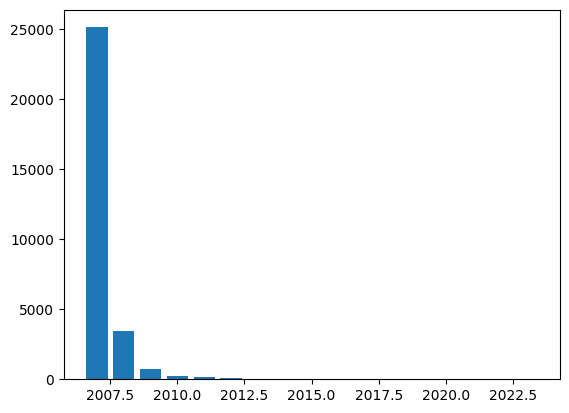

In [4]:
unique_labels, label_counts = np.unique(y_unfiltered, return_counts=True)
plt.bar(unique_labels, label_counts)
print(unique_labels, label_counts)
picked_years = label_counts >= 20
picked_years = unique_labels[picked_years]
print("Picked years", picked_years)

In [5]:
mask = np.array([x in picked_years for x in y_unfiltered]) 
X = X_unfiltered[mask]
y = y_unfiltered[mask]

### Sparse data regression

In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Ridge regression model
ridge_model = KNeighborsRegressor()

# Train the Ridge regression model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)
print("Predictions:", y_pred, "Correct:", y_test)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Predictions: [2007.  2007.4 2007.  ... 2007.  2007.6 2007.6] Correct: [2007 2007 2007 ... 2007 2007 2007]
Mean Squared Error: 0.7212291249164993


<BarContainer object of 6 artists>

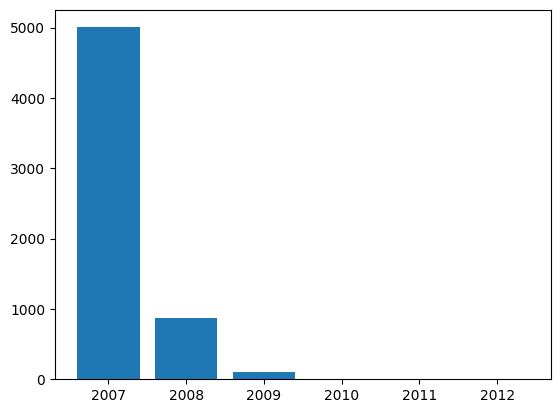

In [64]:
a,b = np.unique(np.round(y_pred), return_counts=True)
plt.bar(a,b)


In [65]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report

print(classification_report(y_test, np.round(y_pred), zero_division=0))

              precision    recall  f1-score   support

        2007       0.86      0.85      0.85      5027
        2008       0.15      0.19      0.17       687
        2009       0.07      0.05      0.06       146
        2010       0.17      0.02      0.03        53
        2011       0.00      0.00      0.00        30
        2012       0.00      0.00      0.00        16
        2013       0.00      0.00      0.00         9
        2014       0.00      0.00      0.00         6
        2015       0.00      0.00      0.00         4
        2016       0.00      0.00      0.00         6
        2017       0.00      0.00      0.00         4

    accuracy                           0.74      5988
   macro avg       0.11      0.10      0.10      5988
weighted avg       0.74      0.74      0.74      5988



##### KNN Regression

In [66]:
knn_regression_results = pd.DataFrame(classification_report(y_test, np.round(y_pred), zero_division=0, output_dict=True))
knn_regression_results

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,accuracy,macro avg,weighted avg
precision,0.856715,0.149373,0.071429,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.739145,0.113108,0.739577
recall,0.852795,0.190684,0.047945,0.018868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.739145,0.100936,0.739145
f1-score,0.854750,0.167519,0.057377,0.033898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.739145,0.101231,0.738492
support,5027.000000,687.000000,146.000000,53.000000,30.0,16.0,9.0,6.0,4.0,6.0,4.0,0.739145,5988.000000,5988.000000


<BarContainer object of 11 artists>

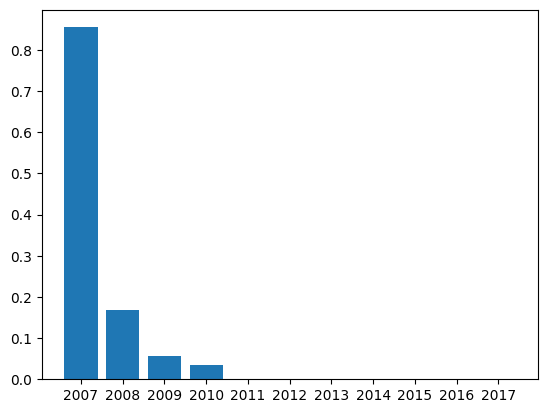

In [67]:
plt.bar(knn_regression_results.columns[:-3], knn_regression_results.loc["f1-score","2007":"2017"])


In [68]:
model1_results = pd.DataFrame({"F1Score":knn_regression_results.loc["f1-score","2007":"2017"], "Label":knn_regression_results.columns[:-3],"Model":["KnnRegression"]*11})
model1_results

,F1Score,Label,Model
2007,0.854750,2007,KnnRegression
2008,0.167519,2008,KnnRegression
2009,0.057377,2009,KnnRegression
2010,0.033898,2010,KnnRegression
2011,0.000000,2011,KnnRegression
2012,0.000000,2012,KnnRegression
2013,0.000000,2013,KnnRegression
2014,0.000000,2014,KnnRegression
2015,0.000000,2015,KnnRegression
2016,0.000000,2016,KnnRegression


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Ridge regression model
ridge_model = DecisionTreeClassifier()

# Train the Ridge regression model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)
print("Predictions:", y_pred, "Correct:", y_test)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

<BarContainer object of 11 artists>

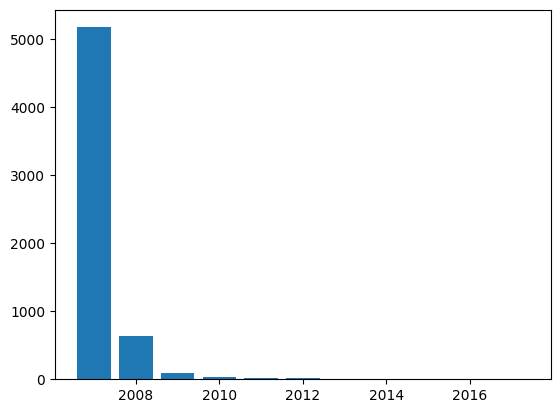

In [46]:
a,b = np.unique(np.round(y_pred), return_counts=True)
plt.bar(a,b)


In [47]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report

print(classification_report(y_test, np.round(y_pred), zero_division=0))

              precision    recall  f1-score   support

        2007       0.84      0.87      0.85      5027
        2008       0.12      0.11      0.11       687
        2009       0.06      0.03      0.04       146
        2010       0.06      0.04      0.05        53
        2011       0.00      0.00      0.00        30
        2012       0.00      0.00      0.00        16
        2013       0.00      0.00      0.00         9
        2014       0.00      0.00      0.00         6
        2015       0.00      0.00      0.00         4
        2016       0.00      0.00      0.00         6
        2017       0.00      0.00      0.00         4

    accuracy                           0.74      5988
   macro avg       0.10      0.10      0.10      5988
weighted avg       0.72      0.74      0.73      5988



In [48]:
decision_tree_classifier_results = pd.DataFrame(classification_report(y_test, np.round(y_pred), zero_division=0, output_dict=True))
decision_tree_classifier_results

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,accuracy,macro avg,weighted avg
precision,0.841230,0.119237,0.055556,0.057143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.740147,0.097560,0.721763
recall,0.865327,0.109170,0.034247,0.037736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.740147,0.095135,0.740147
f1-score,0.853108,0.113982,0.042373,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.740147,0.095902,0.730708
support,5027.000000,687.000000,146.000000,53.000000,30.0,16.0,9.0,6.0,4.0,6.0,4.0,0.740147,5988.000000,5988.000000


<BarContainer object of 11 artists>

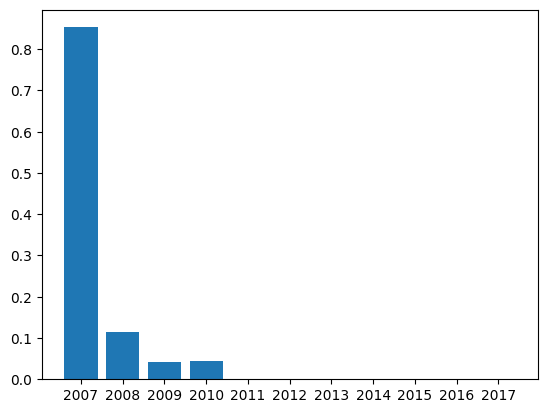

In [49]:
plt.bar(decision_tree_classifier_results.columns[:-3], decision_tree_classifier_results.loc["f1-score","2007":"2017"])


In [54]:
model2_results = pd.DataFrame({"F1Score":decision_tree_classifier_results.loc["f1-score","2007":"2017"], "Label":decision_tree_classifier_results.columns[:-3],"Model":["TreeClassifier"]*11})
model2_results

,F1Score,Label,Model
2007,0.853108,2007,TreeClassifier
2008,0.113982,2008,TreeClassifier
2009,0.042373,2009,TreeClassifier
2010,0.045455,2010,TreeClassifier
2011,0.000000,2011,TreeClassifier
2012,0.000000,2012,TreeClassifier
2013,0.000000,2013,TreeClassifier
2014,0.000000,2014,TreeClassifier
2015,0.000000,2015,TreeClassifier
2016,0.000000,2016,TreeClassifier


### Sparse data classification

In [51]:
from sklearn.neighbors import KNeighborsClassifier

ridge_model = KNeighborsClassifier(n_neighbors=1)

# Train the Ridge regression model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)
print("Predictions:", y_pred, "Correct:", y_test)

Predictions: [2007 2007 2007 ... 2007 2010 2008] Correct: [2007 2007 2007 ... 2007 2007 2007]


In [55]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report

print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

        2007       0.86      0.85      0.85      5027
        2008       0.19      0.20      0.19       687
        2009       0.09      0.09      0.09       146
        2010       0.02      0.02      0.02        53
        2011       0.04      0.03      0.03        30
        2012       0.11      0.12      0.11        16
        2013       0.12      0.11      0.12         9
        2014       0.00      0.00      0.00         6
        2015       0.33      0.25      0.29         4
        2016       0.17      0.17      0.17         6
        2017       0.00      0.00      0.00         4

    accuracy                           0.74      5988
   macro avg       0.17      0.17      0.17      5988
weighted avg       0.74      0.74      0.74      5988



In [56]:
knn_classifier_results = pd.DataFrame(classification_report(y_test, np.round(y_pred), zero_division=0, output_dict=True))
knn_classifier_results

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,accuracy,macro avg,weighted avg
precision,0.856002,0.190341,0.086667,0.017857,0.035714,0.105263,0.125000,0.0,0.333333,0.166667,0.0,0.741483,0.174259,0.743771
recall,0.852596,0.195051,0.089041,0.018868,0.033333,0.125000,0.111111,0.0,0.250000,0.166667,0.0,0.741483,0.167424,0.741483
f1-score,0.854295,0.192667,0.087838,0.018349,0.034483,0.114286,0.117647,0.0,0.285714,0.166667,0.0,0.741483,0.170177,0.742613
support,5027.000000,687.000000,146.000000,53.000000,30.000000,16.000000,9.000000,6.0,4.000000,6.000000,4.0,0.741483,5988.000000,5988.000000


<BarContainer object of 11 artists>

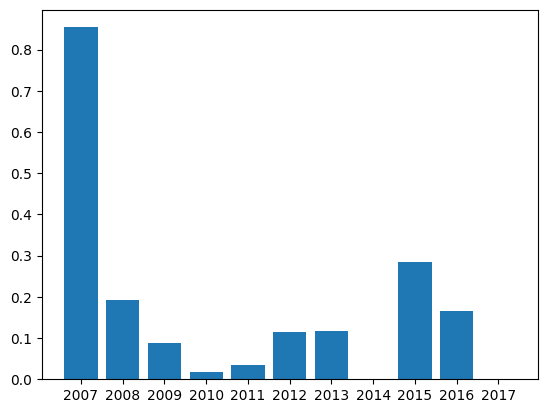

In [57]:
plt.bar(knn_classifier_results.columns[:-3], knn_classifier_results.loc["f1-score","2007":"2017"])


In [60]:
model3_results = pd.DataFrame({"F1Score":knn_classifier_results.loc["f1-score","2007":"2017"], "Label":knn_classifier_results.columns[:-3],"Model":["KnnClassifier"]*11})
model3_results

,F1Score,Label,Model
2007,0.854295,2007,KnnClassifier
2008,0.192667,2008,KnnClassifier
2009,0.087838,2009,KnnClassifier
2010,0.018349,2010,KnnClassifier
2011,0.034483,2011,KnnClassifier
2012,0.114286,2012,KnnClassifier
2013,0.117647,2013,KnnClassifier
2014,0.000000,2014,KnnClassifier
2015,0.285714,2015,KnnClassifier
2016,0.166667,2016,KnnClassifier


[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017] [20108  2746   582   210   123    63    36    24    18    24    17]


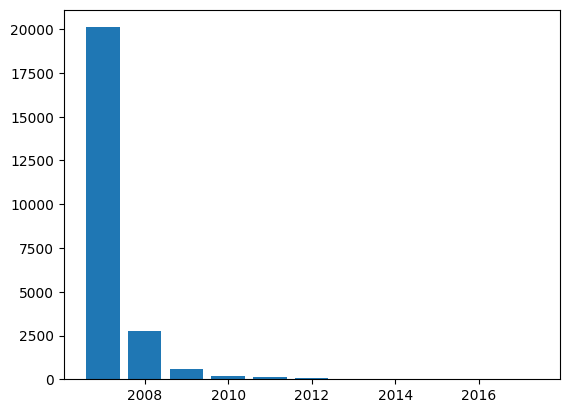

In [59]:
unique_labels, label_counts = np.unique(y_train, return_counts=True)
plt.bar(unique_labels, label_counts)
print(unique_labels, label_counts)

##### Merge all results

Text(0.5, 1.0, 'F1 scores per label per model')

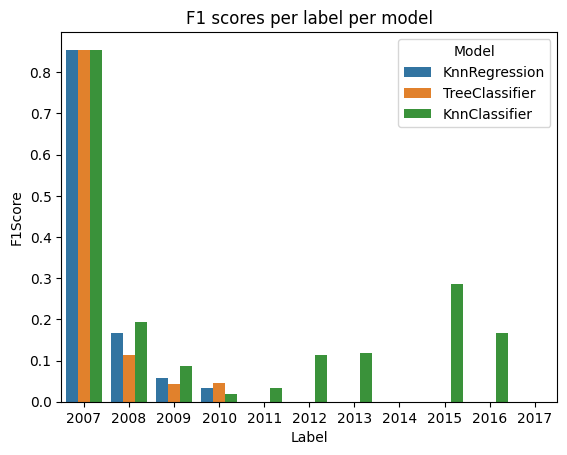

In [70]:
all_results = pd.concat([model1_results,model2_results,model3_results])

import seaborn as sns

sns.barplot(all_results, x= "Label", y="F1Score", hue="Model")
plt.title("F1 scores per label per model")

### Oversampling

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, y_train = smote.fit_resample(X_train, y_train)

print(X.shape, X_train.shape)


(29939, 57157) (221188, 57157)


In [7]:
print("Original", np.unique(y, return_counts=True))
print("Resampled train", np.unique(y_train, return_counts=True))
print("Test", np.unique(y_test, return_counts=True))

Original (array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64), array([25135,  3433,   728,   263,   153,    79,    45,    30,    22,
          30,    21], dtype=int64))
Resampled train (array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64), array([20108, 20108, 20108, 20108, 20108, 20108, 20108, 20108, 20108,
       20108, 20108], dtype=int64))
Test (array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64), array([5027,  687,  146,   53,   30,   16,    9,    6,    4,    6,    4],
      dtype=int64))


##### KnnRegression

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report

ridge_model = KNeighborsRegressor()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

knn_regression_results = pd.DataFrame(classification_report(y_test, np.round(y_pred), zero_division=0, output_dict=True))
display(knn_regression_results)

model4_results = pd.DataFrame({"F1Score":knn_regression_results.loc["f1-score","2007":"2017"], "Label":knn_regression_results.columns[:-3],"Model":["KnnRegression"]*11})
model4_results

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,accuracy,macro avg,weighted avg
precision,0.944444,0.128018,0.031072,0.018945,0.002660,0.016216,0.011111,0.0,0.015873,0.032258,0.0,0.081496,0.109145,0.808602
recall,0.013527,0.509461,0.335616,0.264151,0.033333,0.187500,0.111111,0.0,0.250000,0.166667,0.0,0.081496,0.170124,0.081496
f1-score,0.026672,0.204619,0.056878,0.035354,0.004926,0.029851,0.020202,0.0,0.029851,0.054054,0.0,0.081496,0.042037,0.047776
support,5027.000000,687.000000,146.000000,53.000000,30.000000,16.000000,9.000000,6.0,4.000000,6.000000,4.0,0.081496,5988.000000,5988.000000


,F1Score,Label,Model
2007,0.026672,2007,KnnRegression
2008,0.204619,2008,KnnRegression
2009,0.056878,2009,KnnRegression
2010,0.035354,2010,KnnRegression
2011,0.004926,2011,KnnRegression
2012,0.029851,2012,KnnRegression
2013,0.020202,2013,KnnRegression
2014,0.000000,2014,KnnRegression
2015,0.029851,2015,KnnRegression
2016,0.054054,2016,KnnRegression


##### Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

ridge_model = DecisionTreeClassifier()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

decision_tree_classifier_results = pd.DataFrame(classification_report(y_test, np.round(y_pred), zero_division=0, output_dict=True))
display(decision_tree_classifier_results)

model5_results = pd.DataFrame({"F1Score":decision_tree_classifier_results.loc["f1-score","2007":"2017"], "Label":decision_tree_classifier_results.columns[:-3],"Model":["TreeClassifier"]*11})
model5_results

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,accuracy,macro avg,weighted avg
precision,0.850954,0.135307,0.060465,0.024096,0.021739,0.0,0.0,0.0,0.0,0.0,0.0,0.686707,0.099324,0.731707
recall,0.789338,0.186317,0.089041,0.037736,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.686707,0.103251,0.686707
f1-score,0.818989,0.156767,0.072022,0.029412,0.026316,0.0,0.0,0.0,0.0,0.0,0.0,0.686707,0.100319,0.707685
support,5027.000000,687.000000,146.000000,53.000000,30.000000,16.0,9.0,6.0,4.0,6.0,4.0,0.686707,5988.000000,5988.000000


,F1Score,Label,Model
2007,0.818989,2007,TreeClassifier
2008,0.156767,2008,TreeClassifier
2009,0.072022,2009,TreeClassifier
2010,0.029412,2010,TreeClassifier
2011,0.026316,2011,TreeClassifier
2012,0.000000,2012,TreeClassifier
2013,0.000000,2013,TreeClassifier
2014,0.000000,2014,TreeClassifier
2015,0.000000,2015,TreeClassifier
2016,0.000000,2016,TreeClassifier


##### KnnClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

ridge_model = KNeighborsClassifier(n_neighbors=1)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

knn_classifier_results = pd.DataFrame(classification_report(y_test, np.round(y_pred), zero_division=0, output_dict=True))
display(knn_classifier_results)

model6_results = pd.DataFrame({"F1Score":knn_classifier_results.loc["f1-score","2007":"2017"], "Label":knn_classifier_results.columns[:-3],"Model":["KnnClassifier"]*11})
model6_results



,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,accuracy,macro avg,weighted avg
precision,0.874725,0.123529,0.039078,0.019560,0.003861,0.015504,0.018868,0.0,0.018868,0.033333,0.0,0.20491,0.104302,0.749776
recall,0.158345,0.550218,0.267123,0.150943,0.033333,0.125000,0.111111,0.0,0.250000,0.166667,0.0,0.20491,0.164795,0.204910
f1-score,0.268149,0.201761,0.068182,0.034632,0.006920,0.027586,0.032258,0.0,0.035088,0.055556,0.0,0.20491,0.066376,0.250467
support,5027.000000,687.000000,146.000000,53.000000,30.000000,16.000000,9.000000,6.0,4.000000,6.000000,4.0,0.20491,5988.000000,5988.000000


,F1Score,Label,Model
2007,0.268149,2007,KnnClassifier
2008,0.201761,2008,KnnClassifier
2009,0.068182,2009,KnnClassifier
2010,0.034632,2010,KnnClassifier
2011,0.006920,2011,KnnClassifier
2012,0.027586,2012,KnnClassifier
2013,0.032258,2013,KnnClassifier
2014,0.000000,2014,KnnClassifier
2015,0.035088,2015,KnnClassifier
2016,0.055556,2016,KnnClassifier


Text(0.5, 1.0, 'F1 scores per label per model')

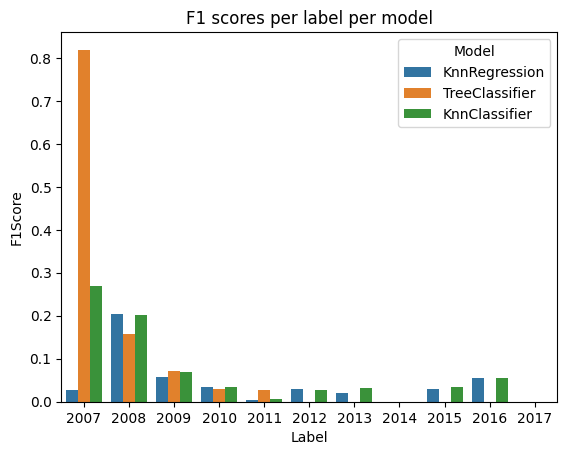

In [12]:
import seaborn as sns

all_results = pd.concat([model4_results, model5_results, model6_results])

sns.barplot(all_results, x= "Label", y="F1Score", hue="Model")
plt.title("F1 scores per label per model")